In [2]:
#Imports

import numpy as np
from scipy.optimize import fsolve
import math
import bisect


HW 0 Solution:

In [3]:
def st(m,gam):
    return 1 + .5 * (gam - 1)*m**2

def f1_res(m, ast_by_a, gam):
    return ast_by_a - m*((gam+1)/(2+(gam-1)*m**2))**(.5*(gam+1)/(gam-1))

def f2_res(sp, ast_by_a, gam):
    return ast_by_a - ( ((2/(gam-1))*(sp**((gam-1)/gam) - 1))**.5) * (((((gam+1)/2)**(gam/(gam-1)))/sp)**(.5*(gam+1)/gam))

def tbm_res(theta, m1, beta, gam):
    tmp = (m1*math.sin(beta))**2
    return math.tan(beta)/math.tan(beta-theta) - (gam+1)*tmp/(2+(gam-1)*tmp)


In [4]:
#1
m1 = fsolve(f1_res, x0=.5, args=(.5, 1.4))[0]
m2 = fsolve(f1_res, x0=1.5, args=(.5, 1.4))[0]
print('1. a: %5.4f, \t b: %5.3f' %(m1, m2))

1. a: 0.3059, 	 b: 2.197


In [5]:
#2
sp1 = fsolve(f2_res, x0=1.1, args=(.5, 1.4))[0]
sp2 = fsolve(f2_res, x0=2.5, args=(.5, 1.4))[0]
print('2. a: %5.3f, \t b: %5.3f'%(sp1, sp2))

2. a: 1.067, 	 b: 10.646


In [6]:
#3
deg = math.pi/180
theta1 = fsolve(tbm_res, x0=0, args=(5, 29.8*deg, 1.4))[0]
theta2 = fsolve(tbm_res, x0=0, args=(5, 84.556*deg, 1.4))[0]
print('3. a: %5.4f, \t b: %5.3f'%(theta1/deg, theta2/deg))

3. a: 19.9992, 	 b: 20.001


/mnt/bgfs/mbriaz/4854461/ipykernel_266994/1488290224.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tan(beta)/math.tan(beta-theta) - (gam+1)*tmp/(2+(gam-1)*tmp)


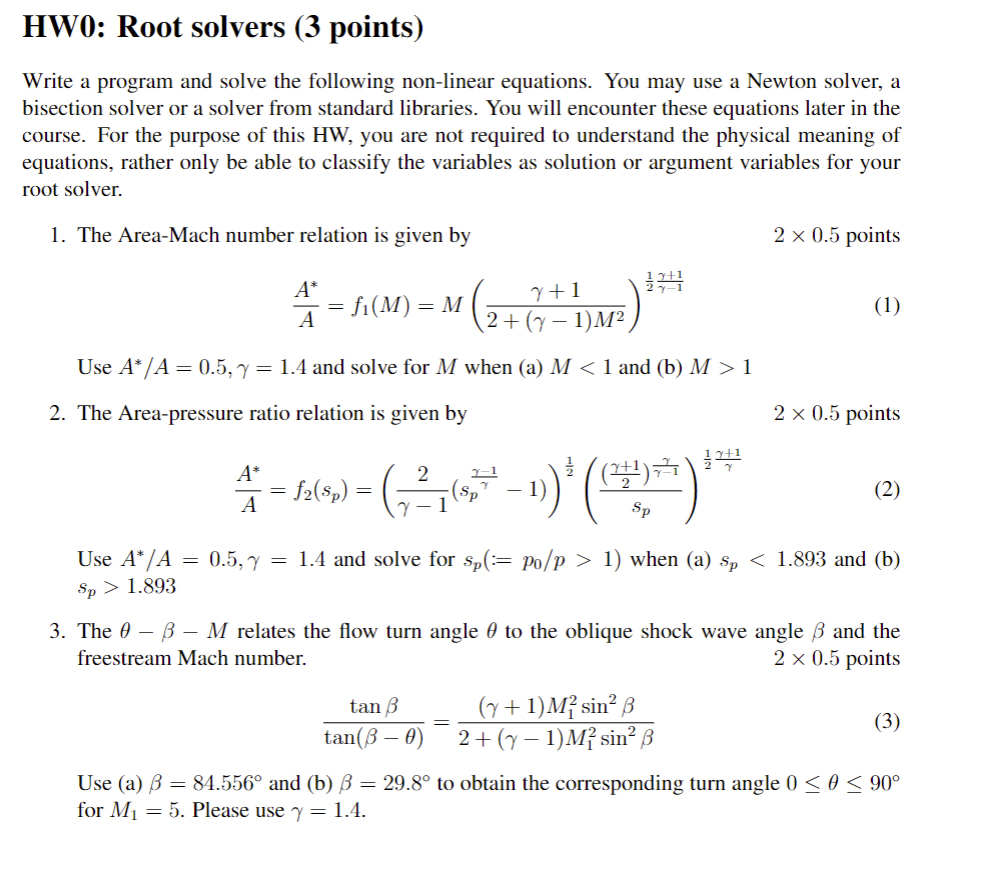

HW 1 Solution

In [7]:
#1
R = 287.05
gam = 1.4
p1 = 5000
r1 = .2
p2 = 7000
r2 = r1*((p2/p1)**(1/gam)) #For Isentropic Process
del_s=-R*math.log(p2/p1) #For Isothermal Process
print('1. a: %5.3f [kg/m^3], b: %5.3f [J/kg*K]'%(r2,del_s))

1. a: 0.254 [kg/m^3], b: -96.584 [J/kg*K]


In [8]:
#2
atm = 101325
T1 = 288
T2 = 645
cp = .849e3
cv = .658e3
p1 = 1*atm
p2 = 10*atm

del_h = cp*(T2-T1)
del_u = cv*(T2-T1)
R = cp - cv
del_s = cp*math.log(T2/T1) - R*math.log(p2/p1)
print('2. a: %5.3f [J/kg], b: %5.3f [J/kg], c: %5.3f [J/kg]'%(del_h, del_u, del_s))

2. a: 303093.000 [J/kg], b: 234906.000 [J/kg], c: 244.746 [J/kg]


In [9]:
#3
R = 287.05
gam = 1.4
atm = 101325
T0 = 450;
p0 = 10*atm
p1 = 1*atm
T1 = T0*((p1/p0)**((gam-1)/gam)) #Isentropic Process
r1 = p1/(R*T1)
print('3. a: %5.3f [K], b: %5.3f [kg/m^3]'%(T1, r1))

3. a: 233.076 [K], b: 1.514 [kg/m^3]


In [10]:
#4
R = 287.05
gam = 1.4
cp = gam*R/(gam-1)
p = 5e3
r = .08
u = 2e3
T = p/(r*R)
T0 = T + ((u**2)/(cp*2)) #Energy Conservation
p0 = p*( (T0/T)**(gam/(gam - 1))) #Isentropic Process
r0 = r*( (T0/T)**(1/(gam-1))) #Isentropic Process
print('4. a: %5.3f [kPa], b: %5.3f [kg/m^3]'%(p0/1e3, r0))

4. a: 16616.176 [kPa], b: 26.211 [kg/m^3]


In [11]:
#5
R = 287.05
gam = 1.4
atm = 101325
cp = gam*R/(gam-1)
p0 = 1500*atm
T0 = 1800
u = 1.8e3
T = T0 - ((u**2)/(cp*2)) #Energy Conservation
p = p0*((T/T0)**(gam/(gam-1))) # Isentropic Process
r = p/(R*T)
p_bernoulli = p0 - .5*(r*(u**2))
print('5. a: %5.3f [K], b: %5.3f [atm], c: %5.3f [atm]'%(T, p/atm, p_bernoulli/atm))


5. a: 187.538 [K], b: 0.548 [atm], c: 1483.521 [atm]


In [12]:
#6
R = 287.05
gam = 1.4
T0_T = (1+gam)/2 #Energy Conservation
p0_p = (T0_T)**(gam/(gam-1)) #Isentropic Process
T0 = 850
T = T0/((1+gam)/2)
u = math.sqrt(gam*R*T)
print('6. a: %5.3f, b: %5.3f [m/s]'%(p0_p,u))

6. a: 1.893, b: 533.533 [m/s]


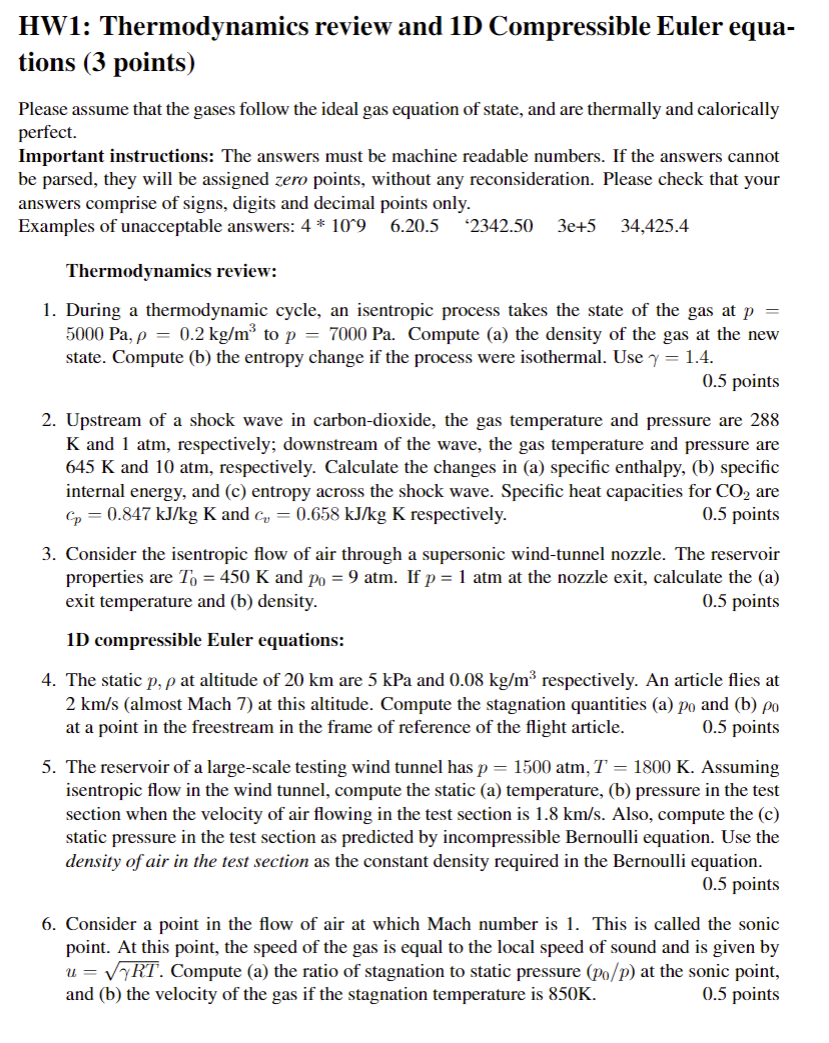

HW 2 Solutions

In [13]:
#1
r1 = .08 # [kg/m^3]
p1 = 5000 # [Pa]
u1 = 591.6 # [m/s]
u2 = 221.852 # [m/s]
R = 287.05 # [J/kg*K]
gam = 1.4
cp = gam*R/(gam-1)
T1 = p1/(r1*R)

r2 = r1*u1/u2 #a
T2 = T1 + (u1**2 - u2**2)/(2*cp) #b
p02_p01 = (r2/r1)*(T2/T1)**(-1/(gam-1)) #c

print('1. a: %5.3f [kg/m^3] b: %5.3f [K], c: %5.3f '%(r2, T2, p02_p01))

1. a: 0.213 [kg/m^3] b: 367.418 [K], c: 0.721 


In [14]:
#2
R = 287.05 # [J/kg*K]
gam = 1.4
A1 = .5 # [m^2]
r1 = .1 # [kg/m^3]
T1 = 300 # [K]
u1 = 298.95 # [m/s]

A2 = 1 #[m^2]
u2 = 110.621 # [m/s]

#b find the density in state 2
#From quasi-1D analysis, r1*u1*A1 = r2*u2*A2
r2 = r1*u1*A1/(u2*A2)

#a use b to solve for temperature in state 2 using energy conservation
T2 = T1 + (u1**2 - u2**2)/(2*cp)

#c Finding the force of the duct, use the derivation from in class
#F = -(p2*A2 - p1*A1) - mdot*(u2-u1) ; mdot = r1*u1*A1 = r2*u2*A2)

p1 = r1*R*T1 # [Pa]
p2 = r2*R*T2 # [Pa]
mdot = r1*u1*A1 # [kg/s]

F = -(p2*A2 - p1*A1) - mdot*(u2-u1)

#Now if, u1 = 520.828 [m/s] and u2 = 680.936 [m/s], with r1 and T1 unchanged
#find p2 and force on the duct

u1_e = 520.828 # [m/s]
u2_e = 680.936 # [m/s]
r1_e = .1 # [kg/m^3]
T1_e = 300 # [K]
r2_e = r1_e*u1_e*A1/(u2_e*A2)
T2_e = T1_e + (u1_e**2 - u2_e**2)/(2*cp)
p1_e = r1_e*R*T1_e # [Pa]
p2_e = r2_e*R*T2_e # [Pa]
mdot_e = r1_e*u1_e*A1 # [kg/s]

F_e = -(p2_e*A2 - p1_e*A1) - mdot_e*(u2_e-u1_e)

print('2. a: %5.3f [K], b: %5.3f [kg/m^3], c: %5.3f [N], d: %5.3f [Pa], e: %5.3f [Pa]'%(T2, r2, F, p2_e, F_e))

2. a: 338.388 [K], b: 0.135 [kg/m^3], c: -6004.312 [N], d: 2242.125 [Pa], e: -2105.812 [Pa]


In [15]:
#3
De = 3.66 # [m]
Ae = math.pi*De**2/4 # [m^2]
ue = 3196.74 # [m/s]
mdot = 1500 # [kg/s]

atm = 101325
p0 = 80*atm
pa = 1*atm

#a find the exit pressure, pe
#Find the exit density and exit temperature:
re = mdot/(ue*Ae) # [kg/m^3]
#solve for Te
cp = gam*R/(gam-1)
def Te_eq_res(Te):
    return p0/(re*R*Te) - (1 + ue**2/(2*cp*Te))**(gam/(gam-1))
Te = fsolve(Te_eq_res, x0 = 300)[0]

#b find the thrust
F = -((re-pa)*Ae +mdot*ue)/1000 # [kN]

#Energy Conservation
T0 = Te + (ue**2)/(2*cp)

print('3. a: %5.3f [atm], b: %5.3f [kN], c: %5.3f [K]'%(re*R*Te/atm, F, T0))

3. a: 0.118 [atm], b: -3729.082 [kN], c: 6021.064 [K]


In [16]:
#4

vinf = 100 #[m/s]
rinf = 1 # [kg/m^3]
H = 2 # [m]

#a find the mass flow rate across surfaces 3 and 4
fr = .25*rinf*vinf*H # [kg/s]

#b find the drag on the airfoil
drag = .53*rinf*vinf**2*H # [N]

print('4. a: %5.3f [kg/s], b: %5.3f [N]' %(fr, drag))


4. a: 50.000 [kg/s], b: 10600.000 [N]


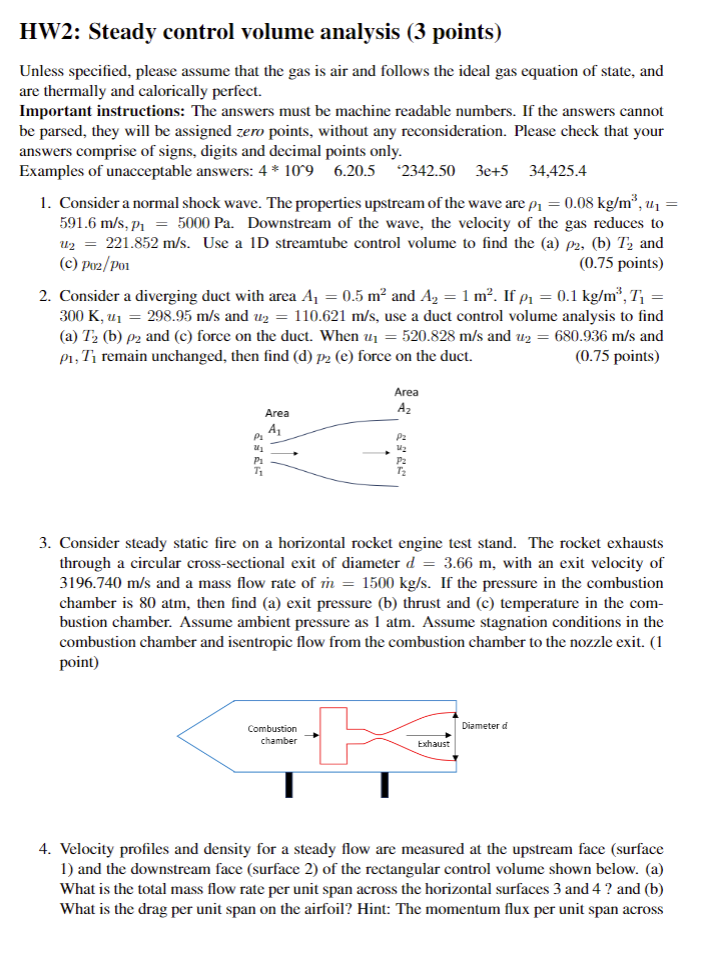
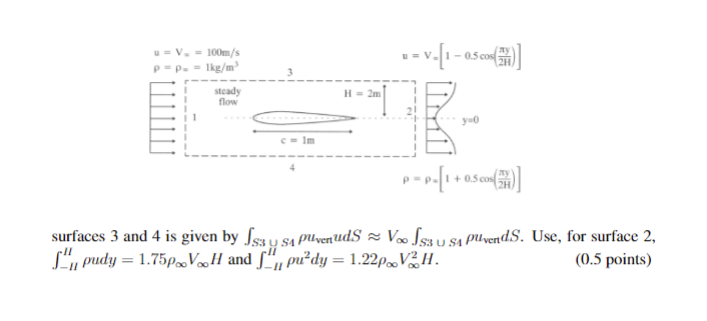
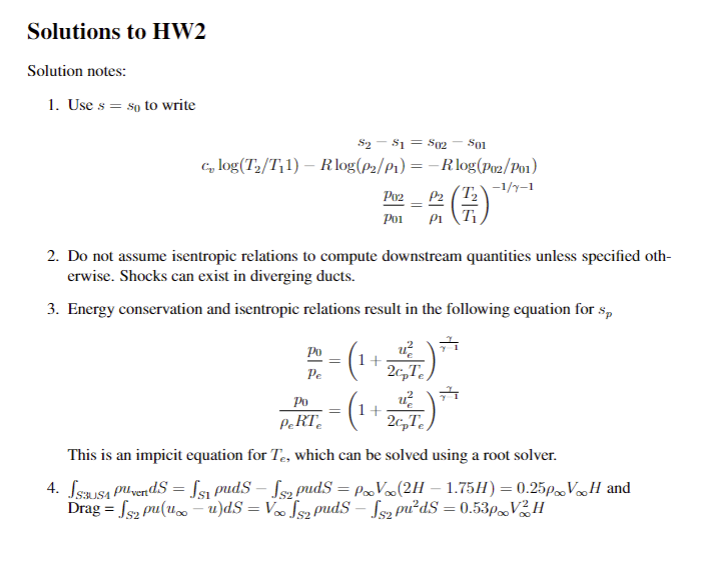

HW 3 Solutions

In [17]:
def normal_shock_ratios(M1, gam):
    pr = 1 + ((2*gam/(gam + 1)) * ((M1**2) - 1))
    dr = ((gam + 1)*M1**2)/(2 + (gam-1)*M1**2)
    x = pr
    y = (dr)**-1
    tr = x*y
    ur = y
    x = ( ((gam+1)*M1**2)/((gam-1)*M1**2 + 2))**(gam/(gam-1))
    y = ( (gam + 1) / (2*gam*M1**2 - (gam - 1)) )** (1/(gam - 1))
    p0r = x*y
    x = 1 + ((gam - 1)/2) * M1**2
    y = (gam*M1**2) - (gam - 1)/2
    M2 = math.sqrt(x/y)
    t0r = ((tr)**-1) * ( (1 + ((gam-1)/2)* M1**2) / (1 + ((gam-1)/2)*M2**2))
    cv = R / (gam - 1)
    ds = cv * math.log(tr) - R * math.log(dr)
    return pr, dr, tr, ur, p0r, M2, t0r, ds

def sT(M, gam):
    sT = 1 + ((gam-1)*M**2)/2
    return sT

def sp(M, gam):
    sp = sT(M, gam)**(gam/(gam-1))
    return sp

In [18]:
#1
gam = 1.4
R = 287.05 # [J/kg*K]
p1 = .9 # [atm]
T1 = 230 # [K]
M1 = 2.7

#Calculate Reservoir Pressure and Temperature
#a

p0 = p1*sp(M1, gam)

#b
T0 = T1*sT(M1, gam)

print('1. a: %5.3f [atm], b: %5.3f [K]'%(p0, T0))

1. a: 20.955 [atm], b: 565.340 [K]


In [19]:
#2
R = 287.05 # [J/kg*K]
gam = 1.4
T0 = 600 # [K]
u = 450 # [m/s]
M = math.sqrt(1/(gam*R*T0/u**2 - (gam-1)/2))

print('2. a: %5.3f '%(M))

2. a: 1.005 


In [44]:
#3

#a find the presure ratio p2/p1
#b find density ratio rho2/rho1
#c find the temperature ratio
#d find the velocity ratio u2/u1
#e find the total pressure ratio p02/p01
#g find M2
#f find the total temperature ratio T02/T01
#h find delta_s

pr, dr, tr, ur, p0r, t0r ,M2, ds = normal_shock_ratios(4.1, 1.4)

print('3. a: %5.3f, b: %5.3f, c: %5.3f, d: %5.3f, e: %5.3f, f: %5.3f \
g: %5.3f, h: %5.3f'%(pr, dr, tr, ur, p0r, M2 ,t0r, ds))


3. a: 19.445, b: 4.624, c: 4.205, d: 0.216, e: 0.128, f: 1.000 g: 0.432, h: 591.093


In [21]:
#4

# My functions index is different than Prof's,
# Please use problem 4 solution and question to understand
# Proper indexing of variables from outputs of function 
# normal_shock_ratios()

pr = fsolve(lambda M1, pr: pr - normal_shock_ratios(M1,gam)[0], x0 = 1.1, args = (9.645))[0]
dr = fsolve(lambda M1, dr: dr - normal_shock_ratios(M1,gam)[1], x0 = 1.1, args = (2.303))[0]
tr = fsolve(lambda M1, tr: tr - normal_shock_ratios(M1,gam)[2], x0 = 1.1, args = (2.922))[0]
ur = fsolve(lambda M1, ur: 1/ur - normal_shock_ratios(M1,gam)[1], x0 = 1.1, args = (.191))[0]
p0r = fsolve(lambda M1, p0r: p0r - normal_shock_ratios(M1,gam)[4], x0 = 1.1, args = (.790))[0]
M2 = normal_shock_ratios(.5,gam)[5]
ds = fsolve(lambda M1, ds: math.exp(-ds/R) - normal_shock_ratios(M1,gam)[4], x0 = 1.1, args = (847.722))[0]

print('4. a: %5.3f, b: %5.3f, c: %5.4f, d: %5.4f, e: %5.4f, f: %5.4f, g: %5.4f'\
         %(pr, dr, tr, ur, p0r, M2, ds))


4. a: 2.900, b: 1.765, c: 3.2000, d: 5.8521, e: 1.8505, f: 2.6458, g: 5.2200


/mnt/bgfs/mbriaz/4854461/ipykernel_266994/2545705965.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  M2 = math.sqrt(x/y)
/mnt/bgfs/mbriaz/4854461/ipykernel_266994/2545705965.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ds = cv * math.log(tr) - R * math.log(dr)


In [22]:
#5
gam = 1.4
T02 = 227 #[K]
p02 = 24 # [kPa]

pr, dr, tr, ur, p0r, t0r ,M2, ds = normal_shock_ratios(2.5, gam)

T2 = T02*sT(2.5, gam)/sT(.3, gam)
p2 = p02*sp(2.5, gam)*p0r/sp(.3, gam)
print('5. a: %5.3f [K], b: %5.3f [kPa]'%(T2, p2))

5. a: 501.719 [K], b: 192.241 [kPa]


In [23]:
#6
gam = 1.4

pr, dr, tr, ur, p0r, t0r ,M2, ds = normal_shock_ratios(1.7, gam)

print('6. a: %5.3f, b: %5.3f'%(sp(.7, gam), p0r*sp(1.7, gam)))

6. a: 1.387, b: 4.224


In [24]:
#7

M1a = fsolve(lambda M1, pitotr: pitotr - normal_shock_ratios(M1, gam)[4]*sp(M1, gam), x0 = 1.1, args = (7.472))[0]
M1b = fsolve(lambda M1, pitotr: pitotr - sp(M1, gam), x0 = 1.1, args = (1.44))[0]

print('7. a: %5.3f, b: %5.3f'%(M1a, M1b))

7. a: 2.330, b: 0.741


/mnt/bgfs/mbriaz/4854461/ipykernel_266994/2545705965.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  M2 = math.sqrt(x/y)
/mnt/bgfs/mbriaz/4854461/ipykernel_266994/2545705965.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ds = cv * math.log(tr) - R * math.log(dr)


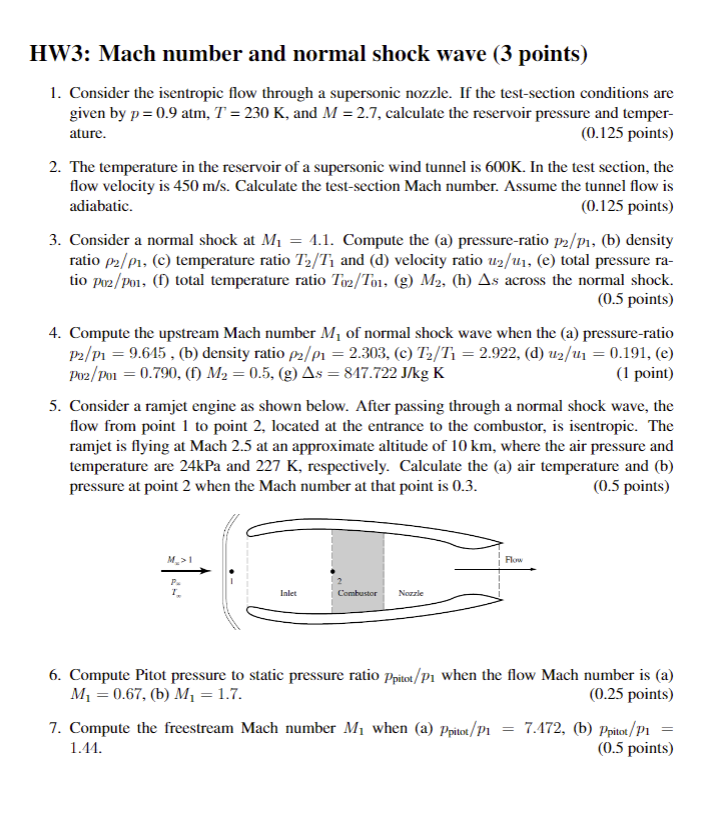
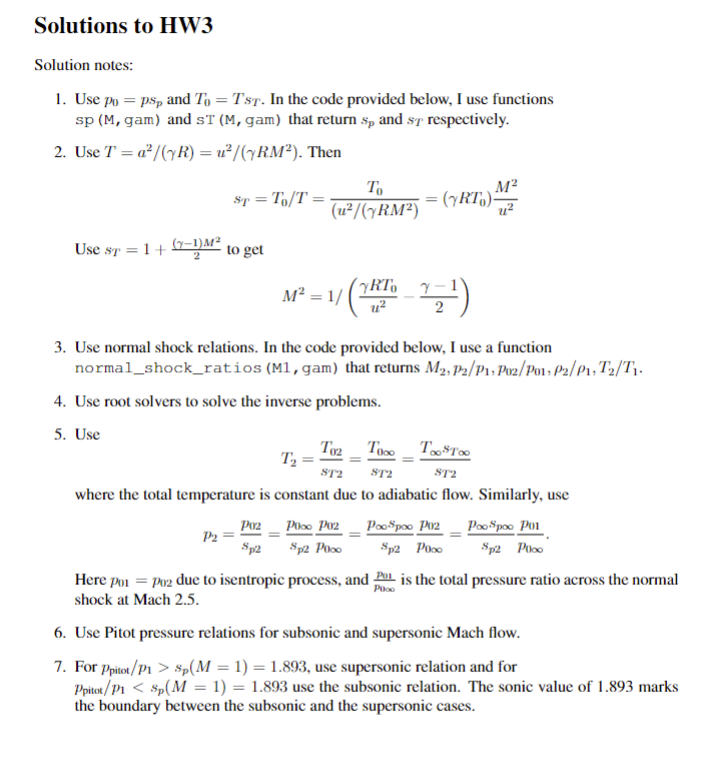


HW 4 Solutions

In [25]:
def tbm(t, b, m): #theta-beta-M relation function
    return math.tan(b-t)/math.tan(b) - (2 + .4*(m*math.sin(b))**2)/(2.4*(m*math.sin(b))**2)

def th_tbm(m, b): #explicit form of the theta-beta-M relation
    th = math.atan((2*(m*math.sin(b))**2 - .2)/ (m**2 * (1.4+math.cos(2*b))+2)/math.tan(b))
    return abs(th)

def mu(M):
    return math.asin(1/M)

def m2nrm(m): #returns m2 from m1 across a normal shock, hardcoded with gamma 1.4
    return((1 + .2 * m**2)/(1.4 * m**2 - .2)) **.5

def ob(m, t, b_init): #M1 theta beta_initialization, hardcoded with gamma 1.4
    b = fsolve(lambda b,m,t: tbm(t, *b,m), x0 = b_init, args = (m, t))[0]
    mn = m*math.sin(b)
    return m2nrm(mn)/math.sin(b-t), 1 + (2.8/2.4) * (mn**2 - 1), b #returns M2, P2/P1 and Beta

#Detachment Functions
def tbm_derivative_res(b,m):
    res = 40 + 8*m**2 * (1 + 5*math.cos(2*b)) + m**4 * (3 + 4*math.cos(2*b) - 7*math.cos(4*b)) #derivative dtheta/dbeta is proportional to res
    return res

def calc_det_theta(m):
    b_det = fsolve(tbm_derivative_res,math.pi/2, args = (m))[0]
    return th_tbm(m, b_det)

def calc_det_m(th):
    m_det = fsolve(lambda m1,th: th - calc_det_theta(*m1), x0 = 1.01, args = (th))[0]
    return m_det

def calc_sonic_theta(m): #we use bisect because fsolve may not respect constraints
    t = bisect(lambda t, m: ob(m,t,mu(m))[0] - 1.0, 0, calc_det_theta(m), args = (m))
    return t

def calc_sonic_m(t): #we use bisect because fsolve may not respect constraints
    m = bisect(lambda m, t: ob(m,t,mu(m))[0] - 1.0, calc_det_m(t), 100, args = (t))
    return m

def calc_mach_reflection_theta(M1):
    th_detach = fsolve(lambda th, M1: th - calc_det_theta(ob(M1, th, mu(M1))[0]), x0 = calc_det_theta(M1), args = (M1))[0]
    return th_detach

def calc_uratio(b, t):
    return math.cos(b)/math.cos(b-t)

def res_type1(phi):
    M2, p21, b21 = ob(M1, th2, mu(M1))
    M5, p52, b52 = ob(M2, *(th2 - phi), mu(M2))
    M3, p31, b31 = ob(M1, th3, mu(M1))
    M4, p43, b43 = ob(M3, *(th3 + phi), mu(M3))
    return p21*p52 - p31*p43



deg = math.pi/180
gam = 1.4

In [26]:
#1
M1 = 3.2
gam = 1.4
M2, pratio, beta = ob(M1, 12*deg, mu(M1))
print('1. a: %5.3f, b: %5.3f, c: %5.3f, d: %5.3f'%(beta/deg, M2, pratio, pratio*sp(M2, gam)/sp(M1, gam)))
M2, pratio, beta = ob(M1, 12*deg, math.pi/2)
print('1. e: %5.3f, f: %5.3f, g: %5.3f, h: %5.3f'%(beta/deg, M2, pratio, pratio*sp(M2, gam)/sp(M1, gam)))

1. a: 27.909, b: 2.561, c: 2.451, d: 0.930
1. e: 85.897, f: 0.484, g: 11.719, h: 0.278


In [27]:
#2
theta = 8.5*deg
beta = 19.19*deg
M1 = fsolve(lambda m, t, b: tbm(t, b, *m), x0 = 1/math.sin(beta), args = (theta, beta))[0] #MN1 > 1 => M > 1/sin(beta)
print('2. a: %5.3f, b: %5.3f'%(theta/deg, ob(M1, theta, mu(M1))[2] / deg))

M1 = 2.65
beta = 30*deg
theta = fsolve(lambda t, m, b: tbm(*t, b, m), x0 = 0, args = (M1, beta))[0]
print('2. c: %5.3f, d: %5.3f'%(theta/deg, ob(M1, theta, mu(M1))[1]))

M1 = 3.9
pratio = 2
theta = fsolve(lambda t, m, pratio: ob(m, *t, mu(m))[1] - pratio, x0 = 1e-2, args = (M1, pratio))[0]
print('2. e: %5.3f, f: %5.3f' %(theta/deg, ob(M1, theta, mu(M1))[2]/deg))

M2 = 3.4279
theta = 10*deg
print('2. g: %5.3f, h: %5.3f'%(M1, ob(M1, theta, mu(M1))[2]/deg))

2. a: 8.500, b: 19.190
2. c: 9.682, d: 1.882
2. e: 7.527, f: 20.452
2. g: 3.900, h: 22.614


In [28]:
#3
#using the detachment functions

th_d = calc_det_theta(6.3)
beta_d = ob(6.3, th_d, mu(6.3))[0]
print('3. a: %5.3f, b: %5.3f'%(th_d/deg, beta_d/deg))

th_s = calc_sonic_theta(6.3)
beta_s = ob(6.3, th_s, mu(m_d))[2]
print('3. e: %5.3f, f: %5.3f'%(m_d, beta_d/deg))

m_s = calc_sonic_m(10*deg)
beta_s = ob(m_s, 10*deg, mu(m_s))[2]
print('3. g: %5.3f, h: %5.3f'%(m_s, beta_s/deg))

3. a: 43.502, b: 57.482


/mnt/bgfs/mbriaz/4854461/ipykernel_266994/3424335431.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = 40 + 8*m**2 * (1 + 5*math.cos(2*b)) + m**4 * (3 + 4*math.cos(2*b) - 7*math.cos(4*b)) #derivative dtheta/dbeta is proportional to res
/work/classtmp/mnelson/AerE361/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


TypeError: 'module' object is not callable

In [29]:
#4

M1 = 2.8
th = 12*deg
M2, p21, b21 = ob(M1, th, mu(M1))
M3, p32, b32 = ob(M2, th, mu(M2))
p31 = p32*p21
phi = b32 - theta
print('4. a: %5.3f, b: %5.3f, c: %5.3f'%(M3, p31, phi/deg))

print('4. d: %5.3f'%(calc_mach_reflection_theta(M1)/deg))

4. a: 1.787, b: 4.427, c: 27.124
4. d: 20.729


/mnt/bgfs/mbriaz/4854461/ipykernel_266994/3424335431.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = 40 + 8*m**2 * (1 + 5*math.cos(2*b)) + m**4 * (3 + 4*math.cos(2*b) - 7*math.cos(4*b)) #derivative dtheta/dbeta is proportional to res
/mnt/bgfs/mbriaz/4854461/ipykernel_266994/3424335431.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tan(b-t)/math.tan(b) - (2 + .4*(m*math.sin(b))**2)/(2.4*(m*math.sin(b))**2)
/mnt/bgfs/mbriaz/4854461/ipykernel_266994/3424335431.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element fr

In [30]:
#6
M1 = 3.5
th2 = 4.0*deg
th3 = 8.0*deg

phi = fsolve(res_type1, x0 = 0)[0]

M2, p21, b21 = ob(M1, th2, mu(M1))
M5, p52, b52 = ob(M2, (th2 - phi), mu(M2))
M3, p31, b31 = ob(M1, th3, mu(M1))
M4, p43, b43 = ob(M3, (th3 + phi), mu(M3))

u21 = calc_uratio(b21, th2)
u52 = calc_uratio(b52, th2 - phi)
u51 = u52*u21

u31 = calc_uratio(b31, th3)
u43 = calc_uratio(b52, th2 - phi)
u41 = u43*u31

print('6. a: %5.3f, b: %5.3f, c: %5.3f' %(phi/deg, p21*p52, (u41-u51)))

6. a: -3.988, b: 2.643, c: -0.023


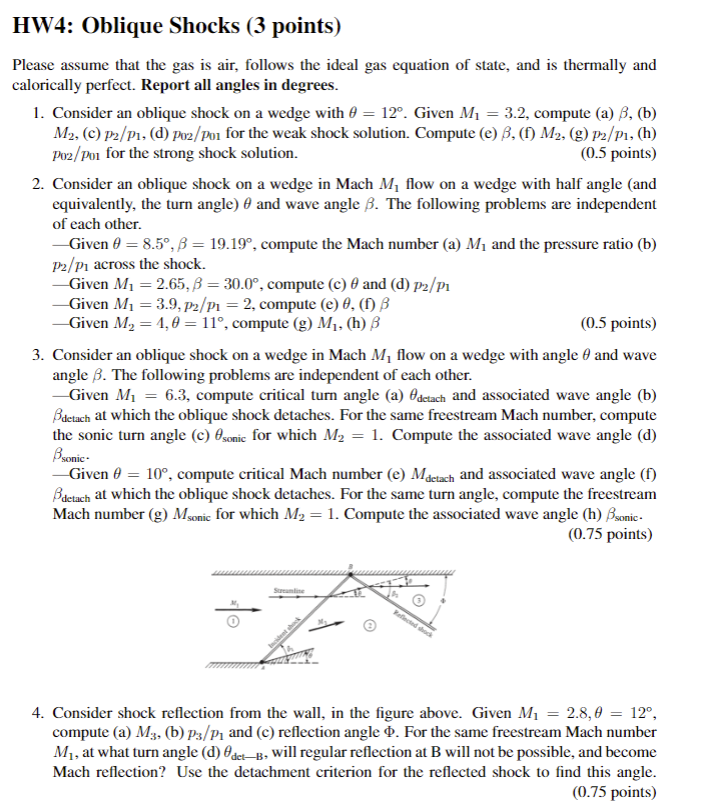
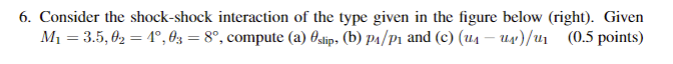
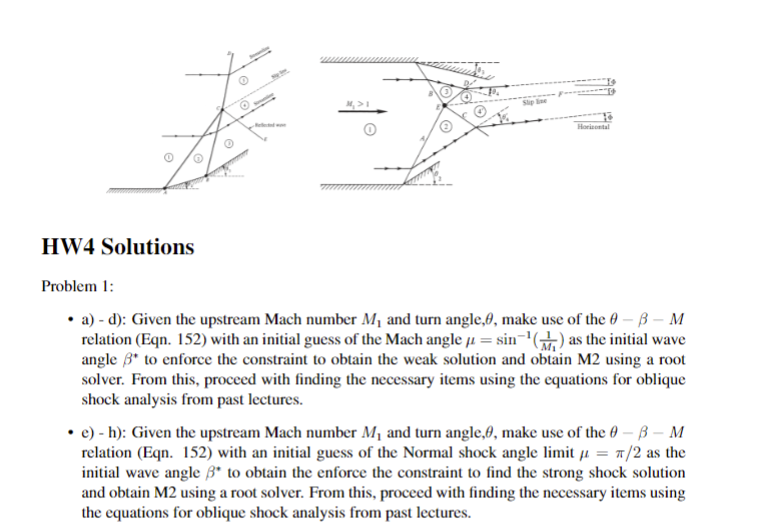
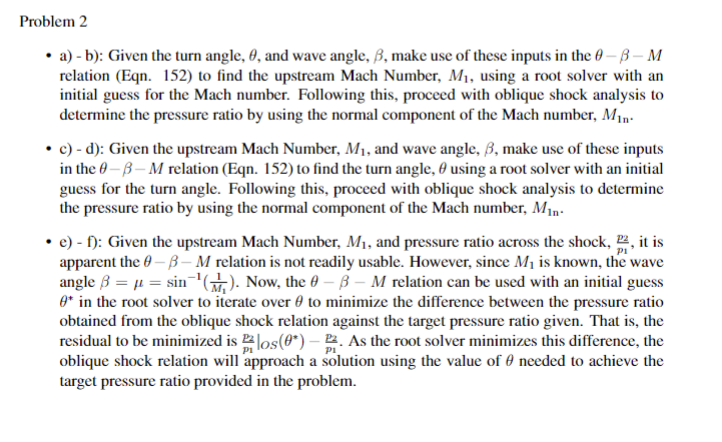
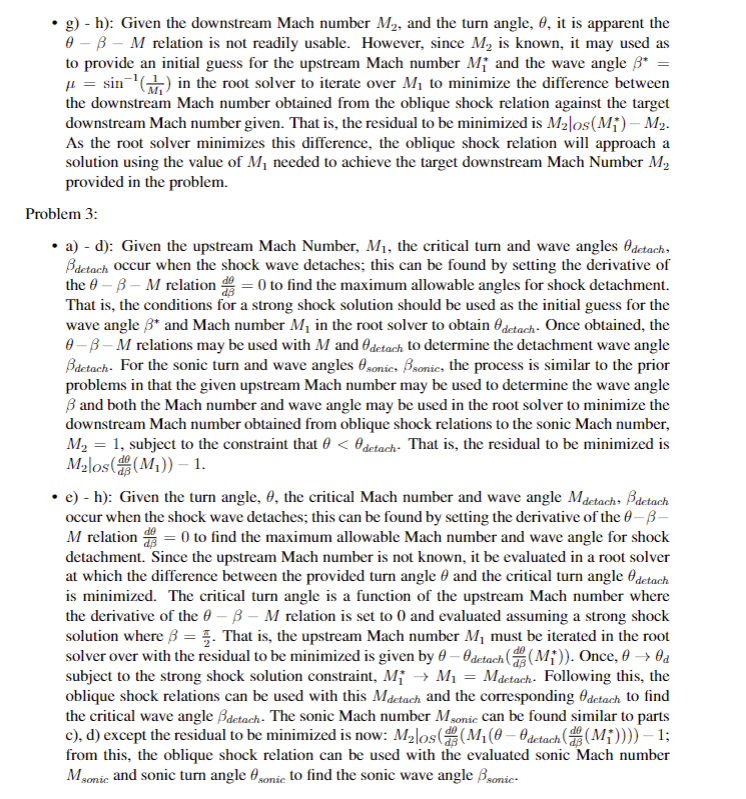
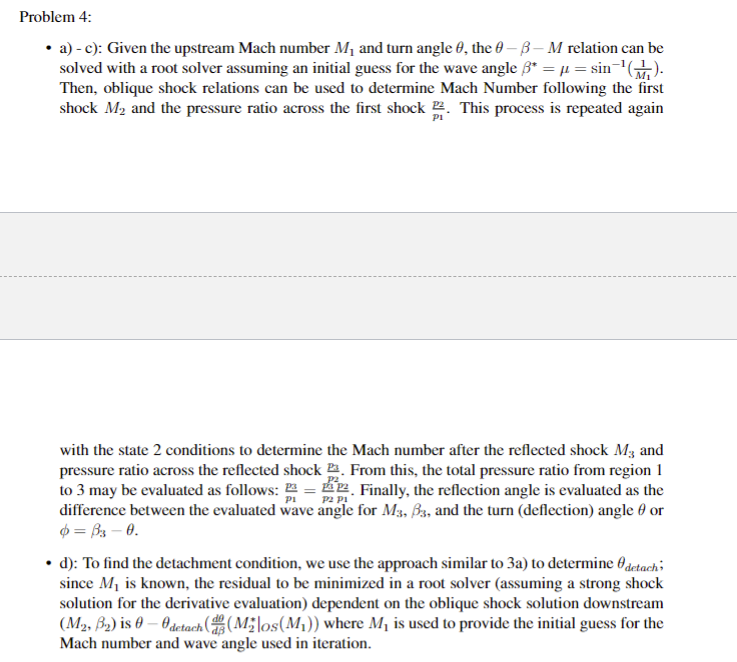
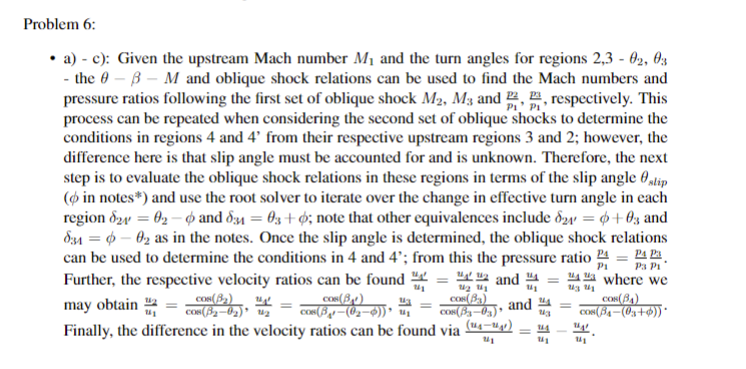

HW 5 CODE BELOW NOT CORRECT 

Only correct one's 1A 1C 2C 2D 4

In [48]:
#For Homework 5, you have to copy and past the Problem # Cell to the bottom of this fuction code then run, and delete. Since there are so many functions but Jupiter keeps it separate. 


#Functions from math import sin, cos, tan, pi
from scipy.optimize import fsolve
import numpy as np
import math as m
import matplotlib.pyplot as plt

g = 1.4
# Prandtl-Meyer functions
def pmfm1(m1,m2,theta):
    return (m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m2**2-1)))-m.atan(m.sqrt(m2**2-1)))-(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m1**2-1)))-m.atan(m.sqrt(m1**2-1)))-theta

def pmfm2(m2,m1,theta):
    return (m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m2**2-1)))-m.atan(m.sqrt(m2**2-1)))-(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m1**2-1)))-m.atan(m.sqrt(m1**2-1)))-theta

def pmftheta(theta,m1,m2):
    return (m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m2**2-1)))-m.atan(m.sqrt(m2**2-1)))-(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m1**2-1)))-m.atan(m.sqrt(m1**2-1)))-theta

def prandtl(M): 
    nu = math.sqrt((gam+1) / (gam-1)) * math.atan(math.sqrt(((gam-1) / (gam+1)) * (M**2 - 1))) - math.atan(math.sqrt(M**2 - 1))
    return nu

def prandtl_meyer_equation(M, nu, gamma):
    return nu - (math.sqrt((gamma + 1) / (gamma - 1)) * math.atan(math.sqrt(((gamma - 1) / (gamma + 1)) * (M**2 - 1))) - math.atan(math.sqrt(M**2 - 1)))

def pr(m2,m1,pr):
    return ((1+0.2*m1**2)/(1+0.2*m2**2))**3.5-pr

def tbmb(b,m,t):
    return ((tan(b))/(tan(b-t)))-((sin(b)*sin(b)*(m**2)*2.4)/((sin(b)*sin(b)*(m**2)*0.4+2)))

def m_n1(m1,b):
    mn1 = m1 * sin(b)
    return mn1

def mach(m1):
    M2 = (((1+0.4/2*m1**2)/(1.4*m1**2-0.4/2))**0.5)
    return M2

def M2(mn2,b,t):
    M2 = mn2/(sin(b-t))
    return M2

def p2p1(mn1):
    p2p1 = 1+2.8/2.4*((mn1**2)-1)
    return p2p1


In [32]:
#Problem 1
def p1():
    m1 = float(input("Mach 1: "))
    theta = m.radians(float(input("Theta: ")))
    args=(m1,theta)
    m2=fsolve(pmfm2,m1+0.1,args=args)[0]
    mu2 = m.degrees(m.asin(1/m2) - theta)
    mu1 = m.degrees(theta)
    pr = ((1+0.2*m1**2)/(1+0.2*m2**2))**3.5
    return print("Mach 2:",m2), print("Forward Mach Line Angle:",mu1), print("Rear Mach Line Angle: ",mu2),print("Pressure Ratio: ",pr)
p1()

Mach 2: 3.976293741550112
Forward Mach Line Angle: 12.000000000000002
Rear Mach Line Angle:  2.565728328365538
Pressure Ratio:  0.33606903247046144


/mnt/bgfs/mbriaz/4854461/ipykernel_266994/4119393772.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return (m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m2**2-1)))-m.atan(m.sqrt(m2**2-1)))-(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m1**2-1)))-m.atan(m.sqrt(m1**2-1)))-theta


(None, None, None, None)

In [34]:
#Problem 2 a b
def p2_1():  
    m1 = float(input("Mach 1: "))
    P2P1 = float(input("Pressure Ratio: "))
    args = (m1,P2P1)
    m2 = fsolve(pr,m1+0.1,args=args)[0]
    theta = m.degrees((m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m2**2-1)))-m.atan(m.sqrt(m2**2-1)))-(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m1**2-1)))-m.atan(m.sqrt(m1**2-1))))
    mu2 = m.degrees(m.asin(1/m2)) - (theta)
    return print("Theta: ",theta), print("RMLA: ", mu2)
p2_1()

Theta:  5.605636273822187
RMLA:  12.628872398975753


(None, None)

In [35]:
#Problem 2 c d
def p2_2():
    m2 = float(input("Mach 2: "))
    theta = m.radians(float(input("Theta: ")))
    args = (m2,theta)
    m1 = fsolve(pmfm1,m2-0.1,args=args)[0]
    P2P1 = ((1+0.2*m1**2)/(1+0.2*m2**2))**3.5
    return print("Mach 1: ",m1), print("Pressure Ratio: ",P2P1)
p2_2()

Mach 1:  3.55009174663556
Pressure Ratio:  0.2122476730567914


/mnt/bgfs/mbriaz/4854461/ipykernel_266994/4119393772.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return (m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m2**2-1)))-m.atan(m.sqrt(m2**2-1)))-(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m1**2-1)))-m.atan(m.sqrt(m1**2-1)))-theta


(None, None)

In [50]:
#Problem 3
M1 = 4 
ang = 13 
mu = math.asin(1/M1) 
theta = mu - math.radians(ang)
nuM2 = theta + prandtl(M1)
initial_guess = 1.1  # Initial guess for M
M2 = fsolve(prandtl_meyer_equation, initial_guess, args=(nuM2, gam)) 
pr = ((1 + ((gam-1) / 2) * M1**2) / (1 + ((gam-1) / 2) * M2**2)) ** (gam / (gam-1)) 
print('Number 3')
print('a) %5.3f c) %5.3f' %(M2, pr))
#For theta =0
ang = 0 
mu = math.asin(1/M1) 
theta = mu - math.radians(ang)
nuM2 = theta + prandtl(M1)
initial_guess = 1.1  # Initial guess for M
M2 = fsolve(prandtl_meyer_equation, initial_guess, args=(nuM2, gam)) 
pr = ((1 + ((gam-1) / 2) * M1**2) / (1 + ((gam-1) / 2) * M2**2)) ** (gam / (gam-1)) 
print('b) %5.3f d) %5.3f' %(M2, pr))

Number 3
a) 4.114 c) 0.860
b) 5.379 d) 0.186


/mnt/bgfs/mbriaz/4854461/ipykernel_266994/927848435.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return nu - (math.sqrt((gamma + 1) / (gamma - 1)) * math.atan(math.sqrt(((gamma - 1) / (gamma + 1)) * (M**2 - 1))) - math.atan(math.sqrt(M**2 - 1)))
/mnt/bgfs/mbriaz/4854461/ipykernel_266994/591798066.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('a) %5.3f c) %5.3f' %(M2, pr))
/mnt/bgfs/mbriaz/4854461/ipykernel_266994/591798066.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operat

In [36]:
#Problem 4
def p4():
    m1 = float(input("Mach 1: "))
    v =  m.degrees(m.sqrt((g+1)/(g-1))*m.pi/2-m.pi/2) - m.degrees(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m1**2-1)))-m.atan(m.sqrt(m1**2-1)))
    return print("Max Turn Angle: ",v)
p4()

Max Turn Angle:  126.89584349271784


In [40]:
#Problem 5
def p5():
    m1 = float(input("Mach 1: "))
    AOA = m.radians(float(input("Angle of Attack: ")))
    wedge = m.radians(float(input("Half Wedge Angle: ")))
    wedgetop = AOA - wedge
    wedgebottom = AOA + wedge
    theta = AOA
    args=(m1,theta)
    m2=fsolve(pmfm2,m1+0.1,args=args)[0]
    P3P1 = ((1+0.2*m1**2)/(1+0.2*m2**2))**3.5
    args=(m1,theta)
    B_Weak=fsolve(tbmb,x0=.5235987,args=args)[0]
    mn1w=m_n1(m1,B_Weak)
    p2p1w=p2p1(mn1w)
    ClPlate = (p2p1w-P3P1)*(2*m.cos(theta)/(g*m1**2))
    args=(m1,wedgetop)
    m2wt=fsolve(pmfm2,m1+0.1,args=args)[0]
    P3P1w = ((1+0.2*m1**2)/(1+0.2*m2wt**2))**3.5
    args=(m1,wedgebottom)
    B_Weakwb=fsolve(tbmb,x0=.5235987,args=args)[0]
    mn1wwb=m_n1(m1,B_Weakwb)
    p2p1wwb=p2p1(mn1wwb)
    ClWedge = (2*(p2p1wwb*(m.cos(AOA+wedge))-P3P1w*m.cos(AOA-wedge)))/(g*m1*m1*m.cos(wedge))
    rpw = ClWedge/ClPlate
    return print("Ratio: ",rpw)

In [41]:
#Problem 6
def p6():
    m1 = float(input("Mach 1: "))
    aoa = m.radians(float(input("Angle of Attack: ")))
    theta = m.radians(float(input("Half Wedge Angle: ")))
    twotheta = 2*theta
    amt = aoa - theta
    apt = aoa + theta
    args=(m1,amt)
    m3=fsolve(pmfm2,m1+0.1,args=args)[0]
    args=(m3,twotheta)
    m5=fsolve(pmfm2,m3+0.1,args=args)[0]
    
    args=(m1,apt)
    Beta=fsolve(tbmb,x0=.5235987,args=args)[0]
    mn1=m_n1(m1,Beta)
    mn2=mach(mn1)
    m2=M2(mn2,Beta,apt)
    args=(m2,twotheta)
    m4=fsolve(pmfm2,m2+0.1,args=args)[0]

    P2P1=p2p1(mn1)
    P4P2 = ((1+0.2*m2**2)/(1+0.2*m4**2))**3.5
    P4P1 = P4P2 * P2P1
    
    P3P1 = ((1+0.2*m1**2)/(1+0.2*m3**2))**3.5
    P5P3 = ((1+0.2*m3**2)/(1+0.2*m5**2))**3.5
    P5P1 =  P3P1 * P5P3

    Cl = (((P2P1 - P5P1) * m.cos(apt)) + ((P4P1 - P3P1) * m.cos(amt))) / (g * m1 * m1 * m.cos(theta))
    Cd = (((P2P1 - P5P1) * m.sin(apt)) + ((P4P1 - P3P1) * m.sin(amt))) / (g * m1 * m1 * m.cos(theta))
        # Print the values
    print("Cl: ", Cl)
    print("Cd: ", Cd)
    print("P4P1: ", P4P1)

    # Return the values as a tuple
    return Cl, Cd, P4P1

In [42]:
#Problem 7
def p7():
    m1 = float(input("Mach 1: "))
    theta2 = m.radians(float(input("Theta 2: ")))
    theta3 = m.radians(float(input("Theta 3: ")))
    args=(m1,theta2)
    Beta12=fsolve(tbmb,x0=.5235987,args=args)[0]
    mn1=m_n1(m1,Beta12)
    mn2=mach(mn1)
    m2=M2(mn2,Beta12,theta2)
    args=(m2,theta3)
    Beta23=fsolve(tbmb,x0=.5235987,args=args)[0]
    mn3=m_n1(m2,Beta23)
    mn4=mach(mn3)
    m3=M2(mn4,Beta23,theta3)
    P2P1=p2p1(mn1)
    P3P2=p2p1(mn3)
    def equations(x):
        equation1 = ((((1+0.2*m3**2)/(1+0.2*x[0]**2))**3.5)*P2P1*P3P2)-((((1+0.2*m1**2)/(1+0.2*x[1]**2))**3.5))
        equation2 = (m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(x[0]**2-1)))-m.atan(m.sqrt(x[0]**2-1)))-(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m3**2-1)))-m.atan(m.sqrt(m2**2-1)))-theta3
        return [equation1,equation2]
    initial_guess = [m1,m3]
    result = fsolve(equations, initial_guess)
    m4 = result[0]
    m5 = result[1]
    args=(m3,m4)
    slip=m.degrees(fsolve(pmftheta,theta2,args=args)[0])
    P4P3 = ((1+0.2*m3**2)/(1+0.2*m4**2))**3.5
    P4P1 = P4P3*P3P2*P2P1
    P5P1=p2p1(mn1)
    return slip



In [43]:
#Problem 8
def p8():
    m1 = float(input("Mach 1: "))
    AOA = m.radians(float(input("Angle of Attack: ")))
    theta = AOA
    args=(m1,theta)
    m3=fsolve(pmfm2,m1+0.1,args=args)[0]
    P3P1 = ((1+0.2*m1**2)/(1+0.2*m3**2))**3.5
    args=(m1,theta)
    Beta=fsolve(tbmb,x0=.5235987,args=args)[0]
    mn1=m_n1(m1,Beta)
    mn2=mach(mn1)
    m2=M2(mn2,Beta,theta)
    P2P1=p2p1(mn1)
    def equations(x):
        equation1 = ((((1+0.2*m2**2)/(1+0.2*x[0]**2))**3.5)*P2P1)-((((1+0.2*m3**2)/(1+0.2*x[1]**2))**3.5)*P3P1)
        equation2 = (m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(x[0]**2-1)))-m.atan(m.sqrt(x[0]**2-1)))-(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m2**2-1)))-m.atan(m.sqrt(m2**2-1)))-theta
        return [equation1,equation2]
    initial_guess = [m2,m3]
    result = fsolve(equations, initial_guess)
    m4 = result[0]
    m5 = result[1]
    args=(m2,m4)
    slip=m.degrees(fsolve(pmftheta,theta,args=args)[0])
    P4P2 = ((1+0.2*m2**2)/(1+0.2*m4**2))**3.5
    args=(m3,theta)
    Beta=fsolve(tbmb,x0=.5235987,args=args)[0]
    mn3=m_n1(m3,Beta)
    P5P3 = p2p1(mn3)
    P4P1 = P4P2 * P2P1
    P5P1 = P5P3 * P3P1
    shear = (m4-m5)/m1
    return print("Slip Angle: ",slip), print("Shear: ",shear)
p8()

/mnt/bgfs/mbriaz/4854461/ipykernel_266994/4119393772.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return (m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m2**2-1)))-m.atan(m.sqrt(m2**2-1)))-(m.sqrt((g+1)/(g-1))*m.atan(m.sqrt((g-1)/(g+1)*(m1**2-1)))-m.atan(m.sqrt(m1**2-1)))-theta


NameError: name 'tan' is not defined